In [1]:
import copy
import numpy as np
import time
from neural_network import NNTrain, get_p
import nn_functions as nn
from nn_functions import relative_err_without_points as rel_err
from plots import plot_fun, plot_iteration, animate_p

In [2]:
%matplotlib notebook
%matplotlib notebook

In [3]:
a = NNTrain(dx_r=0.3, dx_th=0.06, bx=0.01, hidden_nodes=15, alpha=1e-5, batch_size=32, bc=1)

In [4]:
p=[]
p.append(copy.deepcopy(get_p(a)))
a.train(100)

In [15]:
bc_multiplier = 5
thresh = 1e-5

for i in range(100000):
    p.append(copy.deepcopy(get_p(a)))
    if a.alpha < 1e-9  or a.bc > 100000:
        break
    if np.abs(np.mean([s-t for s, t in zip(a.cost_rate[-101:], a.cost_rate[-100:])])) < thresh:
        a.bc *= bc_multiplier
        a.alpha /= bc_multiplier
    a.train(100)

KeyboardInterrupt: 

In [ ]:
a.bc *= bc_multiplier
a.alpha /= bc_multiplier

In [16]:
print('alpha:', a.alpha)
print('BC:', a.bc)
print('relative error:', rel_err(a.p00, a.p01, a.p1, a.p2, dx_r=0.01, dx_th=0.005))
print('number of iterations:', len(a.cost_rate))

alpha: 1.6000000000000004e-08
BC: 625
relative error: 0.009245045827039155
number of iterations: 129469


<IPython.core.display.Javascript object>


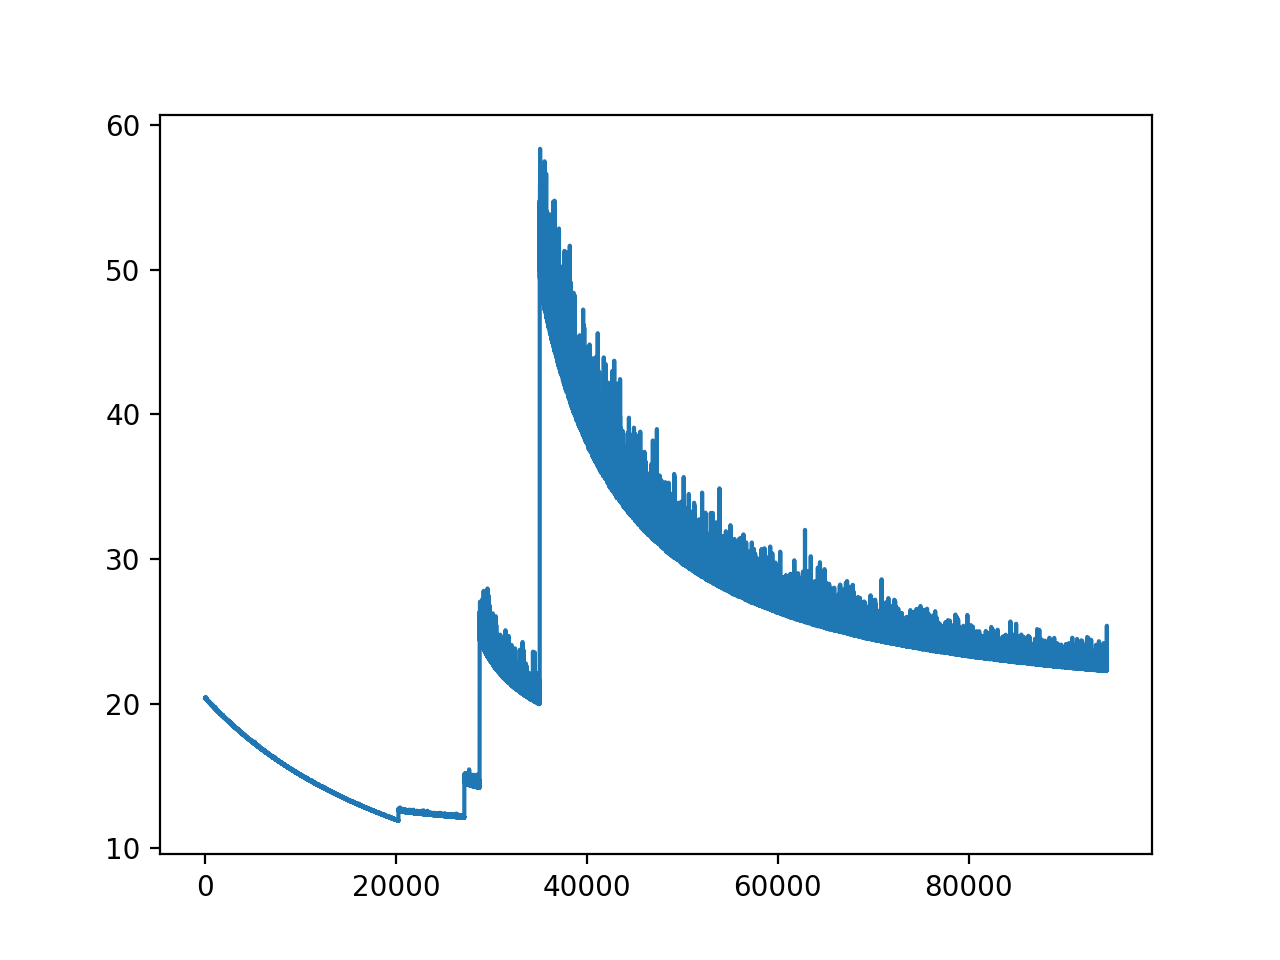

In [17]:
plot_iteration(a.cost_rate, min_it=35000)

<IPython.core.display.Javascript object>


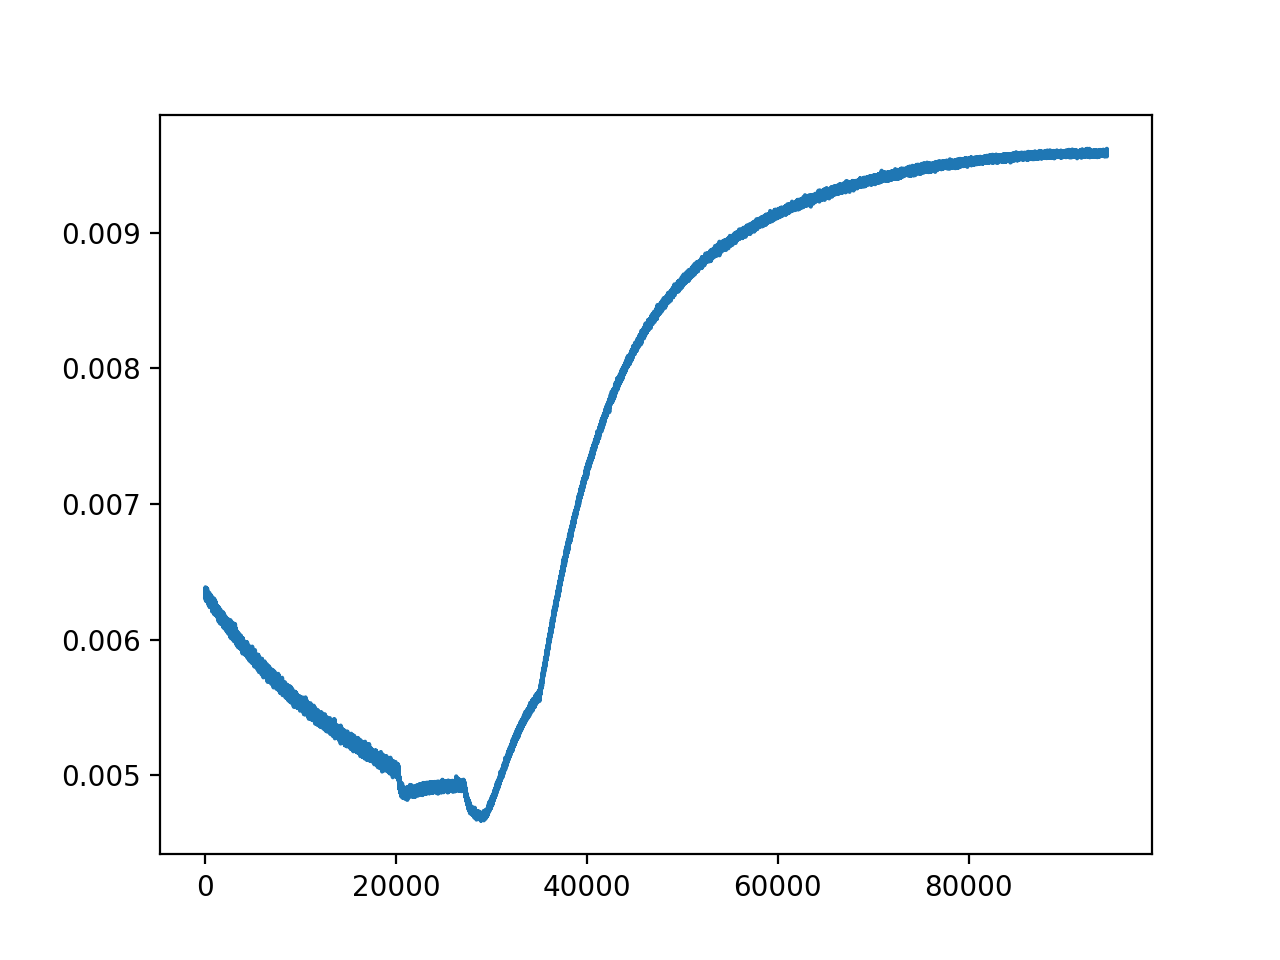

In [18]:
plot_iteration(a.rel_err, min_it=35000)

<IPython.core.display.Javascript object>


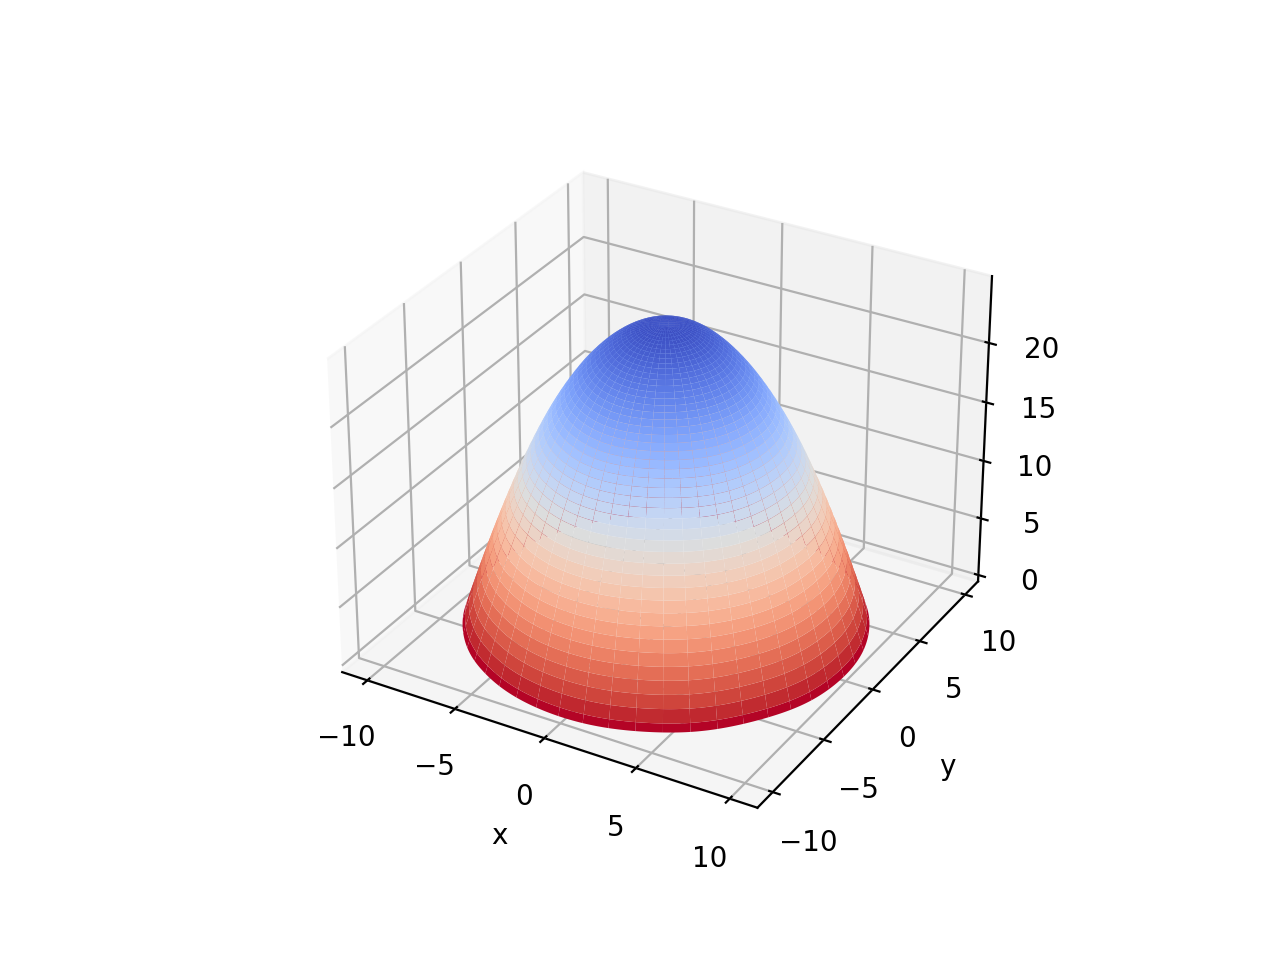

In [9]:
plot_fun(nn.N, p00=a.p00, p01=a.p01, p1=a.p1, p2=a.p2)

In [ ]:
plot_fun(nn.psi_a)

In [ ]:
rel_err_for_p = []

In [21]:
for i in range(len(rel_err_for_p), len(p)):
    rel_err_for_p.append(rel_err(p[i][0][0], p[i][0][1], p[i][1], p[i][2], dx_r=0.013, dx_th=0.008))

In [22]:
rel_err_for_p = np.array(rel_err_for_p)
print(np.where(rel_err_for_p==np.amin(rel_err_for_p))[0][0], np.amin(rel_err_for_p))

646 0.004251355008011548


In [23]:
i=646
rel_err(p[i][0][0], p[i][0][1], p[i][1], p[i][2], dx_r=0.01, dx_th=0.005)

0.00425134334849045

### Load parameters

In [ ]:
name_str = '20200817-2017_eq1_1_v6'

par = np.load('output/' + name_str + '_nn_params.npz', allow_pickle=True)['arr_0']
a.p00 = par[0][0]
a.p01 = par[0][1]
a.p1 = par[1]
a.p2 = par[2]
a.cost_rate = list(np.load('output/' + name_str + '_cost_rate.npz')['arr_0'])
a.rel_err = list(np.load('output/' + name_str + '_rel_err.npz')['arr_0'])
a.m_t = np.load('output/' + name_str + '_momentum.npz')['arr_0']

In [24]:
output_name = 'disk_soft_2_v1'
timestr = time.strftime("%Y%m%d-%H%M")

a.save_result(output_name)

np.savez('output/'+ timestr + '_' + output_name +'_p_list.npz', p)